In [306]:
import math                          
import numpy as np                   
import pandas as pd                  
import scipy                         
import statsmodels.api as sm        
import matplotlib.pyplot as pyplot            
import seaborn as sns               
sns.set() 
import sys
sys.setrecursionlimit(1500)

In [307]:
df=pd.read_csv('total (1).csv',encoding='latin1')
df

,content,time,title
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par..."
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...
...,...,...,...
4974,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...","24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...
4975,Former cricketer Sachin Tendulkar was spotted ...,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...
4976,"Aamir Khan, whose last film Dangal told the st...","03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...
4977,Maharahstra Power Minister Chandrashekhar Bawa...,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused..."


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4852 non-null   object
 1   time     4977 non-null   object
 2   title    4977 non-null   object
dtypes: object(3)
memory usage: 116.8+ KB


In [309]:
content=df['title'][1]
content

'Global labour income estimated to have declined by 3.5 trillion USD in first 3 quarters of 2020: ILO'

In [310]:
import re
content=re.sub('[^a-zA-Z]',' ',str(df['title'][1]))
content=content.lower()
content
# Convert the text into lowercase and remove the ^,"",' and 

'global labour income estimated to have declined by     trillion usd in first   quarters of       ilo'

In [311]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [312]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


In [313]:
import nltk
nltk.download('punkt')
word_list = nltk.word_tokenize(content)
print(word_list)
#Tokenize the sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['global', 'labour', 'income', 'estimated', 'to', 'have', 'declined', 'by', 'trillion', 'usd', 'in', 'first', 'quarters', 'of', 'ilo']


In [314]:
word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
print(word_list)
#Convert the words into meaningful words

['global', 'labour', 'income', 'estimate', 'to', 'have', 'decline', 'by', 'trillion', 'usd', 'in', 'first', 'quarter', 'of', 'ilo']


In [315]:
word_list = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(word_list)

global labour income estimate to have decline by trillion usd in first quarter of ilo


In [316]:
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,3000):
    content=re.sub('[^a-zA-Z]',
                   ' ',
                   str(df['title'][i]))
    content=content.lower()
    word_list = nltk.word_tokenize(content)
    word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
    word_list = ' '.join( word_list)
    corpus.append(word_list)
corpus


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['anil ambani discloses worldwide asset tell uk court that he lead discipline not lavish lifestyle',
 'global labour income estimate to have decline by trillion usd in first quarter of ilo',
 'harley davidson to exit india seek local partner to serve exist customer',
 'rupee depreciates paisa to against u dollar in early trade',
 'jio start offering mobile service on international flight',
 'bytedance applies for tech export licence in china amid tiktok deal talk',
 'reliance jio begin in flight mobile service',
 'harley davidson put brake on india biz',
 'flipkart wholesale enters new city ahead of festive season',
 'sensex crash point amid global sell off nifty slip below',
 'black monday on dalal street',
 'sensex snap day lose streak rally point to reclaim mark',
 'sensex nifty spiral low for th day it stock buck trend',
 'parliament pass bill provide relief to taxpayer on compliance front amid covid',
 'post paid tariff war jio unveils jiopostpaid plus with entertainment int l roa

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = TfidfVectorizer()
x= vectorizer.fit_transform(corpus).toarray()
features=vectorizer.fit_transform(corpus)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [318]:
len(x[0])

5666

In [319]:
x.shape

(3000, 5666)

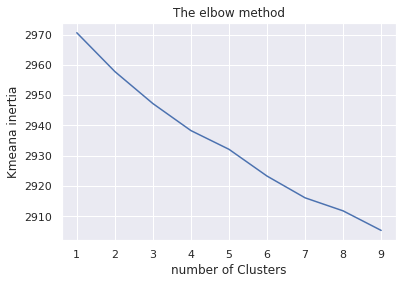

In [320]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pyplot.plot(range(1,10),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()

In [321]:
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
from sklearn.metrics import silhouette_score

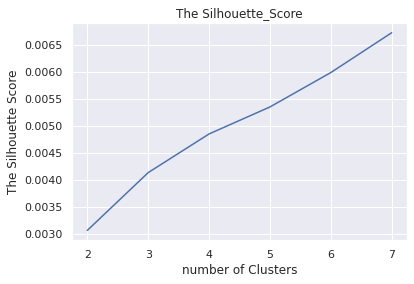

In [322]:
#Evaluation with unlabelled dataset
#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.
from sklearn.cluster import KMeans
Silhouette_score=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    sil_score=silhouette_score(features, labels=kmeans.fit_predict(features)) 
    Silhouette_score.append(sil_score)
Silhouette_score
number_of_Clusters=[2,3,4,5,6,7]
pyplot.plot(range(2,8),Silhouette_score) 
pyplot.title("The Silhouette_Score")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("The Silhouette Score")
pyplot.show()

In [323]:
#Perhaps tuning different parameters for feature extractor 
#and the clustering model will increase this score.
#We can prodict that number of Clusters are three

In [324]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_mean=kmeans.fit_predict(x)
y_means=pd.DataFrame(y_mean)
y_means=y_means.rename(columns={0:'Clusters'})
y_means

,Clusters
0,1
1,3
2,3
3,3
4,1
...,...
2995,1
2996,5
2997,3
2998,5


In [325]:
x=pd.DataFrame(x)
Final_Report=pd.concat([x,y_means],axis=1)
Final_Report

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5637,5638,5639,5640,5641,5642,5643,5644,5645,5646,5647,5648,5649,5650,5651,5652,5653,5654,5655,5656,5657,5658,5659,5660,5661,5662,5663,5664,5665,Clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
#Lets reduce the dimentionality

In [327]:
reduced_features=pd.DataFrame(reduced_features)
reduced_features=reduced_features.rename(columns={0:'Feature1',1:'Feature2'})
reduced_features

,Feature1,Feature2
0,-0.045535,-0.030474
1,0.020240,0.046470
2,-0.084053,0.143808
3,0.037983,0.079611
4,-0.046648,-0.051578
...,...,...
2995,0.034609,-0.017716
2996,-0.107188,-0.040126
2997,0.009955,0.199562
2998,0.102023,0.210138


In [328]:
Final_Report=pd.concat([reduced_features,y_means],axis=1)
Final_Report

,Feature1,Feature2,Clusters
0,-0.045535,-0.030474,1
1,0.020240,0.046470,3
2,-0.084053,0.143808,3
3,0.037983,0.079611,3
4,-0.046648,-0.051578,1
...,...,...,...
2995,0.034609,-0.017716,1
2996,-0.107188,-0.040126,5
2997,0.009955,0.199562,3
2998,0.102023,0.210138,5


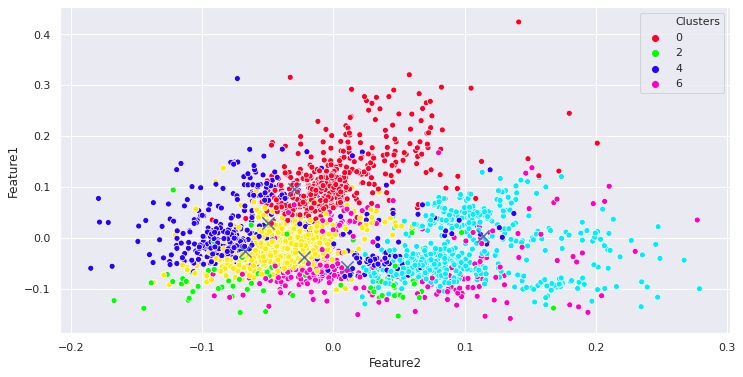

In [329]:
pyplot.figure(figsize=(12,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='Clusters',palette='gist_rainbow')
pyplot.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
pyplot.legend()
pyplot.show()

In [330]:
print("Done")

Done


In [331]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [332]:
get_top_keywords(features,y_mean,vectorizer.get_feature_names(),30)
#0---Bollywood
#1---Politics
#2---corruption
#3---International
#4---Crime
#5---State_news


Cluster 0
from,record,run,indian,found,office,arrest,day,woman,crore,accuse,after,over,get,kill,india,fire,at,with,on,police,mumbai,by,yr,year,case,old,of,delhi,in

Cluster 1
hit,govt,cm,share,not,it,woman,will,report,get,against,his,and,delhi,ban,mumbai,make,win,indian,india,by,have,the,over,after,with,from,at,on,of

Cluster 2
corruption,speak,rahul,new,congress,must,will,bihar,tie,do,sp,after,wish,bjp,in,japan,aib,cm,his,not,akhilesh,narendra,for,gandhi,manmohan,of,to,on,modi,pm

Cluster 3
bjp,due,trump,go,by,want,mumbai,at,have,plan,school,take,woman,sc,indian,year,with,up,after,over,from,on,get,report,india,govt,of,delhi,in,to

Cluster 4
get,seek,call,announces,kill,up,blame,crore,over,sell,cr,mumbai,india,lakh,govt,not,yr,at,slam,time,held,of,on,woman,delhi,arrest,man,in,to,for

Cluster 5
chief,with,old,day,what,woman,my,if,claim,it,say,me,big,have,for,he,year,delhi,at,will,by,on,india,not,after,of,in,the,to,be


In [333]:
Final_Report=pd.concat([df,y_means],axis=1)
Final_Report=Final_Report.dropna()

In [334]:
Final_Report['Clusters'].value_counts()

1.0    1029
3.0     589
0.0     486
4.0     449
5.0     276
2.0      93
Name: Clusters, dtype: int64

In [335]:
Final_Report

,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,1.0
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,3.0
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",3.0
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,3.0
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,1.0
...,...,...,...,...
2995,Shiv Sena legislator and women?s rights activi...,"12 Jul 2017,Wednesday",Maharashtra women jail staff allege sexual abu...,1.0
2996,President Donald Trump said on Wednesday that ...,"13 Jul 2017,Thursday","Islamic State on the run, will soon be wiped o...",5.0
2997,China will downsize its 2.3 million-strong mil...,"12 Jul 2017,Wednesday",China to reduce Army to under 10L in biggest-e...,3.0
2998,The Delhi Transport Corporation (DTC) is going...,"12 Jul 2017,Wednesday",99% of Delhi?s DTC buses to be retired in 5 ye...,5.0


In [336]:
Final_Report['Clusters'].value_counts()

1.0    1029
3.0     589
0.0     486
4.0     449
5.0     276
2.0      93
Name: Clusters, dtype: int64

In [337]:
Final_Report['Clusters']

0       1.0
1       3.0
2       3.0
3       3.0
4       1.0
       ... 
2995    1.0
2996    5.0
2997    3.0
2998    5.0
2999    1.0
Name: Clusters, Length: 2922, dtype: float64

In [349]:
Final_Report['Clusters']=Final_Report['Clusters'].replace({0:'Bollywwod',1:'Politics',2:'Corruption',3:'International',4:'Crime',5:'State_news'})


In [350]:
get_top_keywords(features,y_mean,vectorizer.get_feature_names(),30)
#0---Bollywood
#1---Politics
#2---corruption
#3---International
#4---Crime
#5---State_news


Cluster 0
from,record,run,indian,found,office,arrest,day,woman,crore,accuse,after,over,get,kill,india,fire,at,with,on,police,mumbai,by,yr,year,case,old,of,delhi,in

Cluster 1
hit,govt,cm,share,not,it,woman,will,report,get,against,his,and,delhi,ban,mumbai,make,win,indian,india,by,have,the,over,after,with,from,at,on,of

Cluster 2
corruption,speak,rahul,new,congress,must,will,bihar,tie,do,sp,after,wish,bjp,in,japan,aib,cm,his,not,akhilesh,narendra,for,gandhi,manmohan,of,to,on,modi,pm

Cluster 3
bjp,due,trump,go,by,want,mumbai,at,have,plan,school,take,woman,sc,indian,year,with,up,after,over,from,on,get,report,india,govt,of,delhi,in,to

Cluster 4
get,seek,call,announces,kill,up,blame,crore,over,sell,cr,mumbai,india,lakh,govt,not,yr,at,slam,time,held,of,on,woman,delhi,arrest,man,in,to,for

Cluster 5
chief,with,old,day,what,woman,my,if,claim,it,say,me,big,have,for,he,year,delhi,at,will,by,on,india,not,after,of,in,the,to,be


In [351]:
Final_Report

,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,Crime
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,Politics
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",Politics
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,Politics
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Crime
...,...,...,...,...
2995,Shiv Sena legislator and women?s rights activi...,"12 Jul 2017,Wednesday",Maharashtra women jail staff allege sexual abu...,Crime
2996,President Donald Trump said on Wednesday that ...,"13 Jul 2017,Thursday","Islamic State on the run, will soon be wiped o...",Banking
2997,China will downsize its 2.3 million-strong mil...,"12 Jul 2017,Wednesday",China to reduce Army to under 10L in biggest-e...,Politics
2998,The Delhi Transport Corporation (DTC) is going...,"12 Jul 2017,Wednesday",99% of Delhi?s DTC buses to be retired in 5 ye...,Banking


In [352]:
Final_Report['Clusters'].value_counts()

Crime         1029
Politics       589
Bollywwod      486
State_news     449
Banking        276
Criminals       93
Name: Clusters, dtype: int64

In [357]:
Final_Report[Final_Report['Clusters']=='Crime']
# Select any news from Bollywood Category


,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,Crime
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Crime
7,American cult bike manufacturer Harley-Davidso...,"Sep 25, 2020\r\n ,0...",Harley-Davidson puts brakes on India biz,Crime
8,"Bengaluru, September 24,Flipkart Wholesale, th...","Sep 24, 2020\r\n ,0...",Flipkart Wholesale enters 12 new cities ahead ...,Crime
9,"Mumbai, September 24,Falling for the sixth str...","Sep 24, 2020\r\n ,1...","Sensex crashes 1,115 points amid global sell-o...",Crime
...,...,...,...,...
2979,In the backdrop of the mob violence on Wednesd...,"13 Jul 2017,Thursday",Housing society bans Bangladeshi maids after m...,Crime
2987,"February 9, 2013, 8 am. Convict Afzal Guru han...","12 Jul 2017,Wednesday",India's biggest prison does not have a hangman...,Crime
2988,"Breaking with the President, the lawyer Donald...","12 Jul 2017,Wednesday",Russia probe not witch hunt: Trump's FBI nominee,Crime
2995,Shiv Sena legislator and women?s rights activi...,"12 Jul 2017,Wednesday",Maharashtra women jail staff allege sexual abu...,Crime


In [358]:
Final_Report[(Final_Report['Clusters']=='Crime') & (Final_Report['time']=='12 Jul 2017,Wednesday')]

# Select news from movie category on a partcular date and time....

,content,time,title,Clusters
2987,"February 9, 2013, 8 am. Convict Afzal Guru han...","12 Jul 2017,Wednesday",India's biggest prison does not have a hangman...,Crime
2988,"Breaking with the President, the lawyer Donald...","12 Jul 2017,Wednesday",Russia probe not witch hunt: Trump's FBI nominee,Crime
2995,Shiv Sena legislator and women?s rights activi...,"12 Jul 2017,Wednesday",Maharashtra women jail staff allege sexual abu...,Crime
2999,The Reserve Bank of India is still counting th...,"12 Jul 2017,Wednesday",Still counting notes deposited after demonetis...,Crime


In [359]:
Final_Report.sample(n=10)
#Select any 10 news randomly from the corpus

,content,time,title,Clusters
202,"ââ¦.living only for the moment, savouring t...","Sep 13, 2020\r\n ,0...",How Japanese art movement influenced the world,Crime
1989,United Arab Emirates' envoy to India Ahmed Al ...,"18 Jan 2017,Wednesday",UAE envoy denies seizure of Dawood Ibrahim's a...,Crime
1098,More than 200 sheep have plunged to their deat...,"24 Jul 2017,Monday",Bear chases 200 sheep over cliff edge to their...,Politics
2324,A week after three unidentified bikers robbed ...,"28 Dec 2016,Wednesday","3 arrested for looting ATM cash van, ?9 lakh r...",State_news
2088,A physiotherapist arrested for the murder of a...,"12 Jan 2017,Thursday",Hired killer stole anaesthetic from AIIMS for ...,State_news
2625,Dessert lovers in Kolkata are in for a treat a...,"07 Dec 2016,Wednesday","Bakery serving chocolate replicas of old ?500,...",Crime
1007,A boy killed an eastern European man with a ?s...,"26 Jul 2017,Wednesday",Polish man killed by 'superman punch' from tee...,Crime
1943,"London, Jan 19 (PTI) The head of a website has...","21 Jan 2017,Saturday",UK boss gives staff castle office with ice cav...,Crime
413,"Putting up a stout defence, iconic Sunil Gavas...","Sep 25, 2020\r\n ,0...",I never blamed Anushka nor made sexist comment...,Crime
1738,"Over Rs 16,200 crore in black money has been d...","07 Feb 2017,Tuesday","I-T dept detects ?16,200 crore in black money ...",Bollywwod


In [360]:
print("Done")

Done
